In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv('train.csv')
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,159256.0,79627.500000,45973.391572,0.0,39813.75,79627.5,119441.25,159255.0
age,159256.0,44.306626,11.842286,20.0,40.00,40.0,55.00,85.0
height(cm),159256.0,165.266929,8.818970,135.0,160.00,165.0,170.00,190.0
weight(kg),159256.0,67.143662,12.586198,30.0,60.00,65.0,75.00,130.0
waist(cm),159256.0,83.001990,8.957937,51.0,77.00,83.0,89.00,127.0
eyesight(left),159256.0,1.005798,0.402113,0.1,0.80,1.0,1.20,9.9
eyesight(right),159256.0,1.000989,0.392299,0.1,0.80,1.0,1.20,9.9
hearing(left),159256.0,1.023974,0.152969,1.0,1.00,1.0,1.00,2.0
hearing(right),159256.0,1.023421,0.151238,1.0,1.00,1.0,1.00,2.0
systolic,159256.0,122.503648,12.729315,77.0,114.00,121.0,130.00,213.0


In [7]:
for col in df.columns:
  print(col)
  print(df[col].unique()[:10])
  print()

id
[0 1 2 3 4 5 6 7 8 9]

age
[55 70 20 35 30 50 45 40 60 25]

height(cm)
[165 170 180 160 155 175 150 181 145 185]

weight(kg)
[60 65 75 95 55 70 50 45 90 80]

waist(cm)
[ 81.   89.  105.   80.5  51.   69.   84.5  73.   68.   64. ]

eyesight(left)
[0.5 0.6 0.4 1.5 1.2 0.7 0.8 1.  2.  0.9]

eyesight(right)
[0.6 0.7 0.5 1.2 1.  0.9 1.5 0.8 0.3 0.2]

hearing(left)
[1 2]

hearing(right)
[1 2]

systolic
[135 146 118 131 121 150 137 130 105 107]

relaxation
[87 83 75 88 76 95 91 80 70 60]

fasting blood sugar
[ 94 147  79  91 101  84 100 104  64  71]

Cholesterol
[172 194 178 180 155 199 222 282 243 183]

triglyceride
[300  55 197 203  87 343 153 165 163  27]

HDL
[40 57 45 38 44 31 69 51 59 55]

LDL
[ 75 126  93 102  99 122 198 150 101  56]

hemoglobin
[16.5 16.2 17.4 15.9 15.4 13.  14.5 15.7 13.2 12.9]

Urine protein
[1 3 2 4 5 6]

serum creatinine
[1.  1.1 0.8 0.7 0.9 1.3 1.2 0.5 0.4 0.6]

AST
[22 27 20 19 24 17 16 25 21 23]

ALT
[25 23 31 27 13 42 12 15 21 16]

Gtp
[ 27  37  53  30  17 

In [8]:
categorical = ['hearing(left)', 'hearing(right)', 'dental caries']
numerical = list(set(df.columns) - set(categorical) - {'smoking'})
df[categorical] = df[categorical].astype(str)

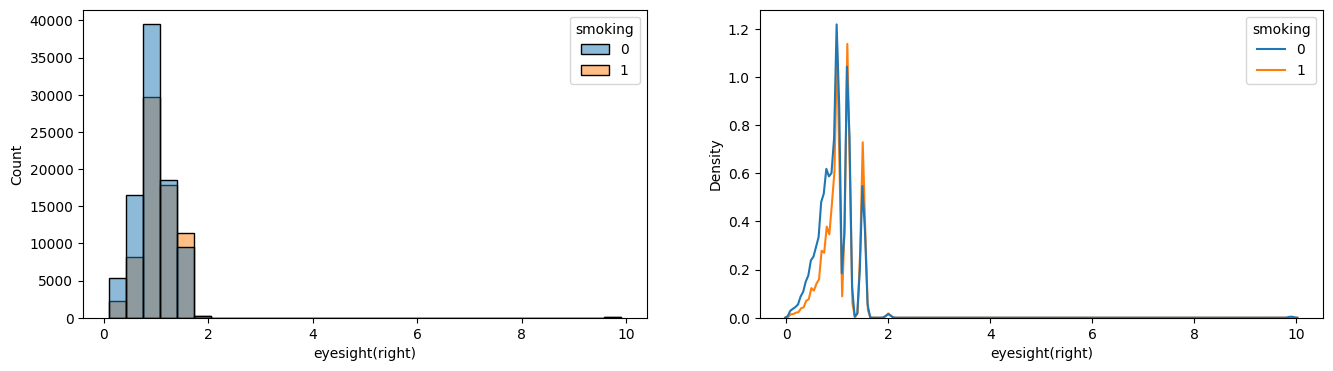

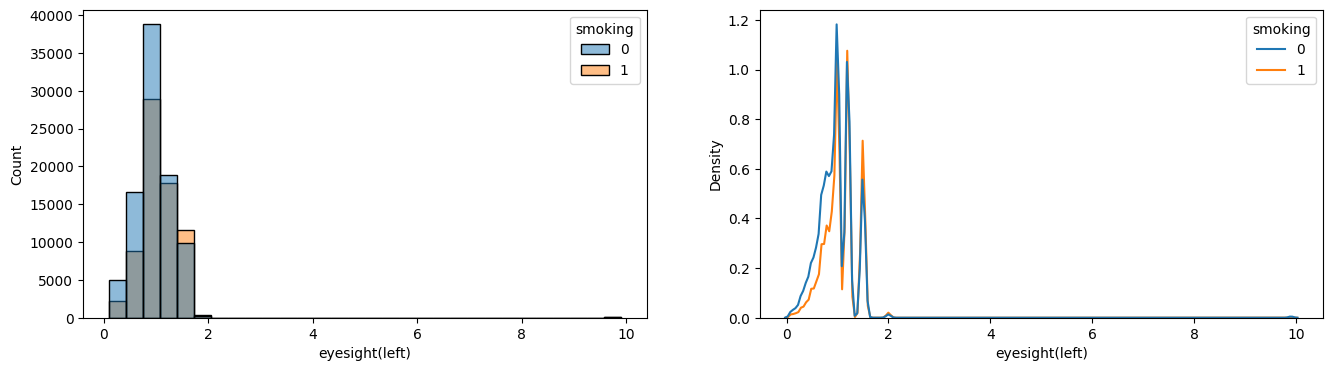

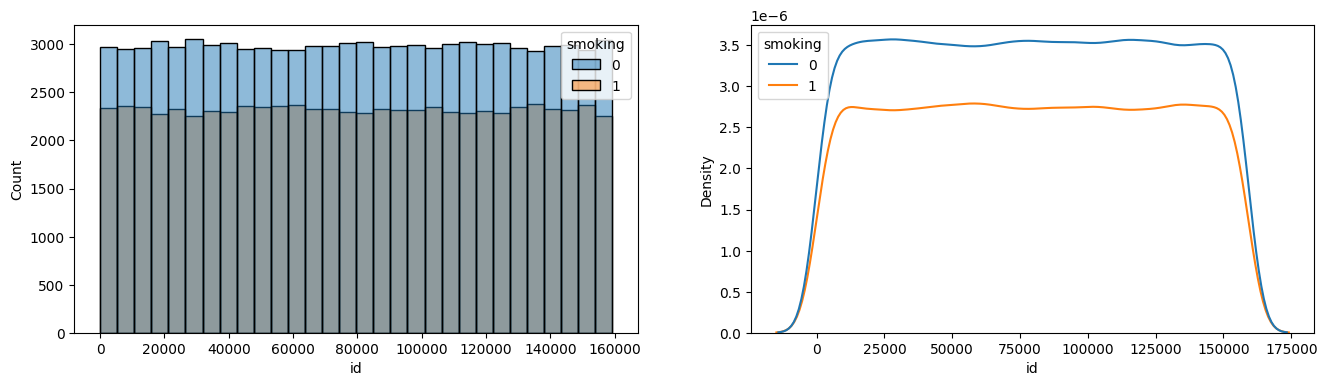

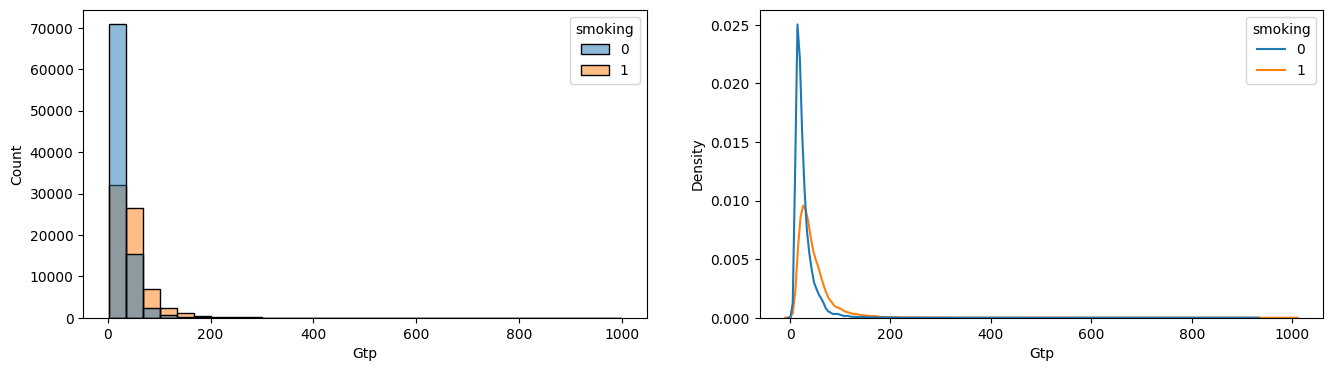

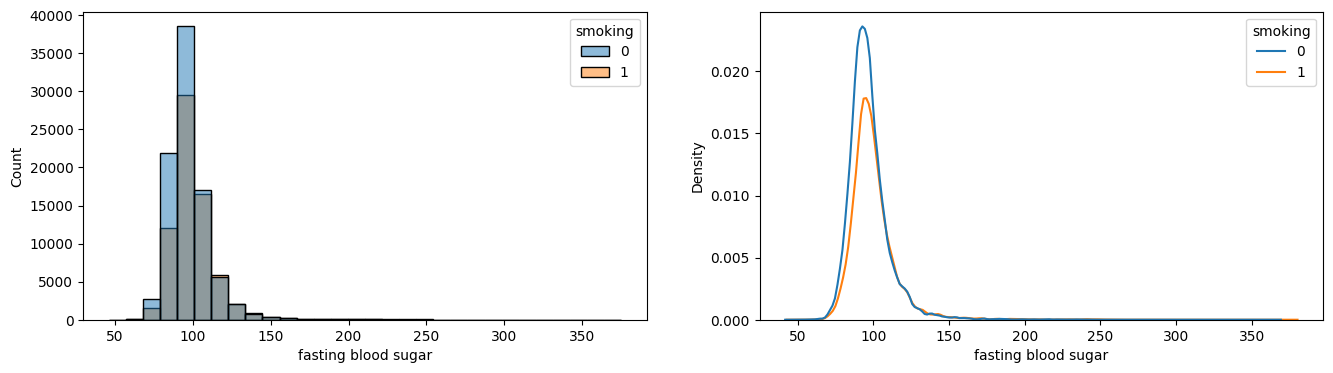

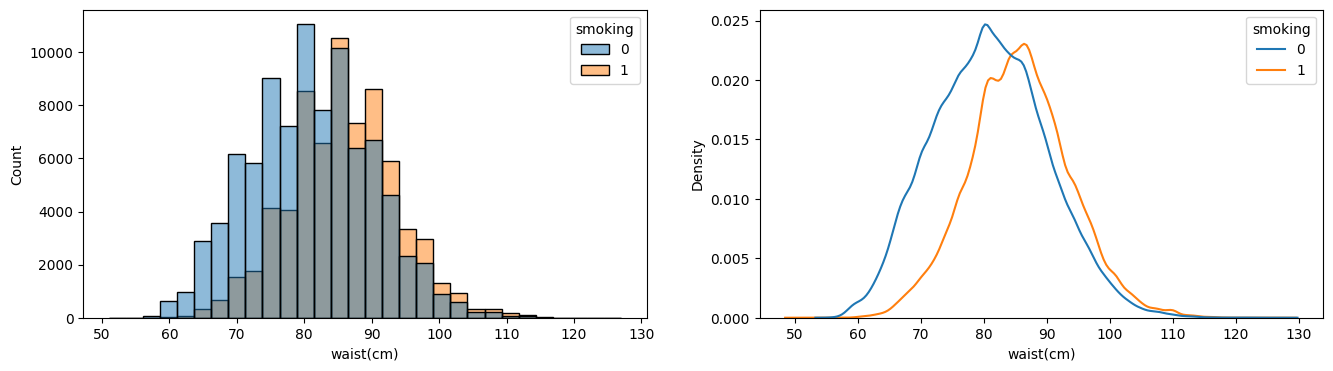

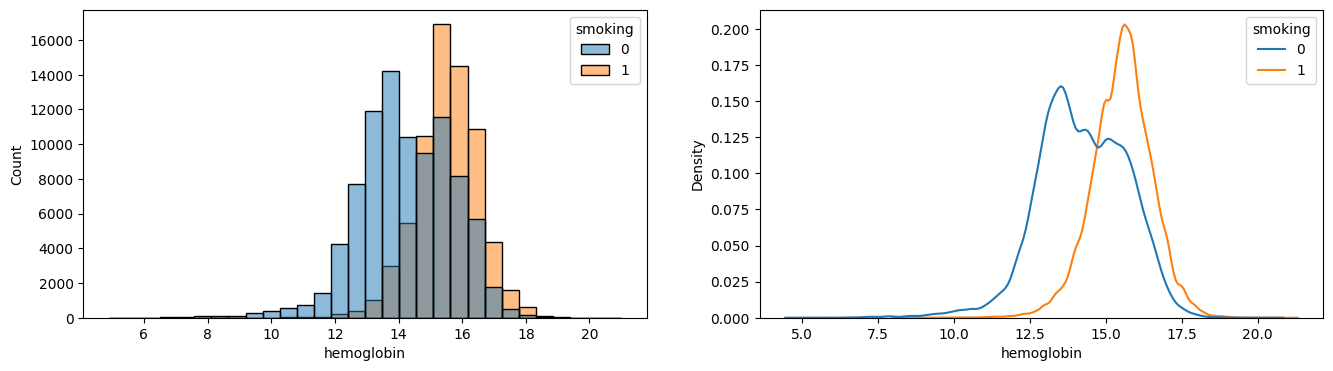

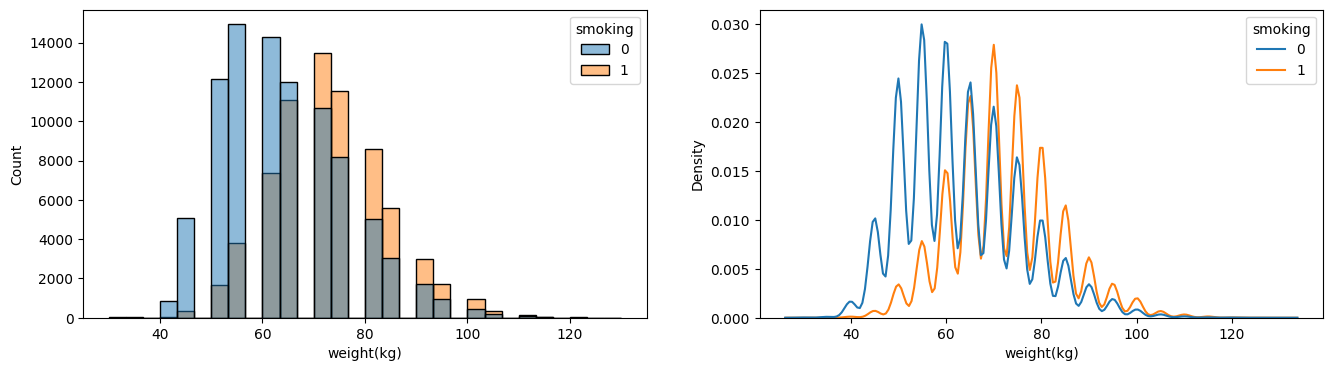

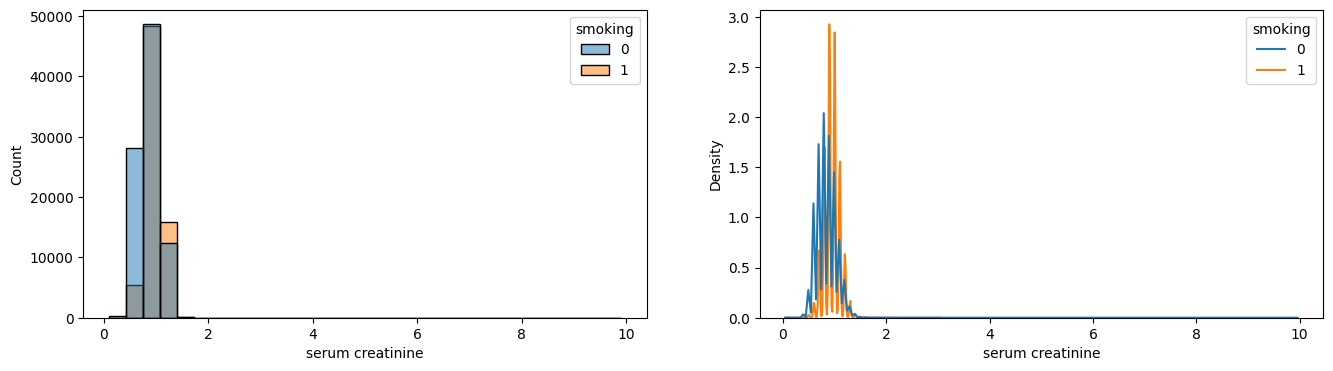

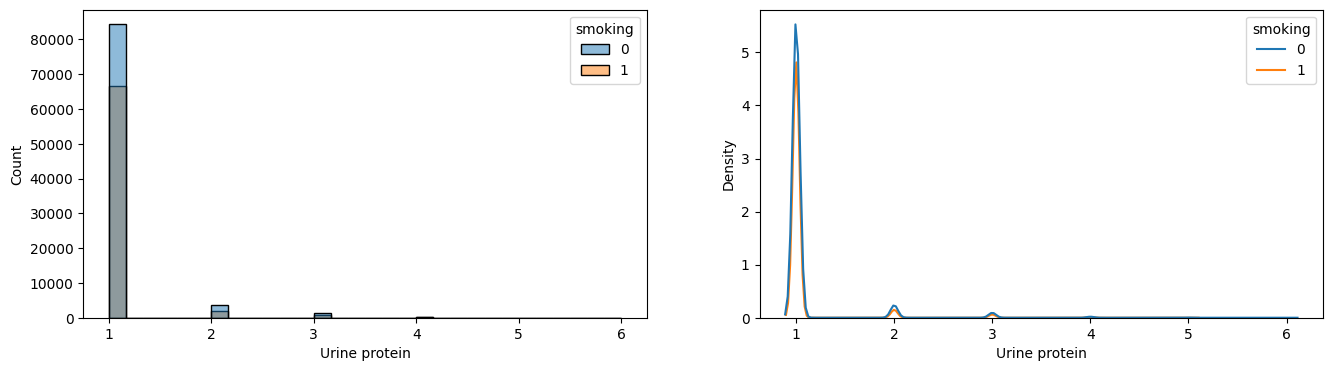

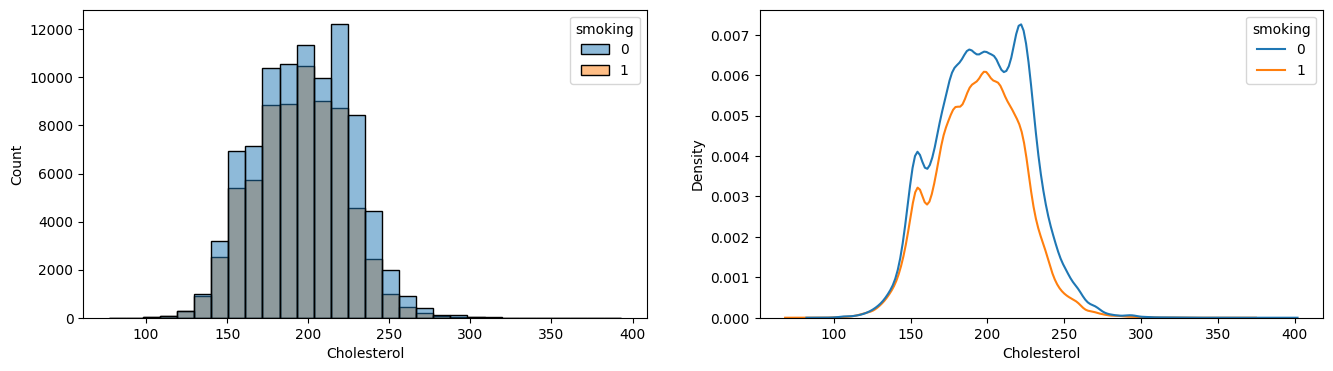

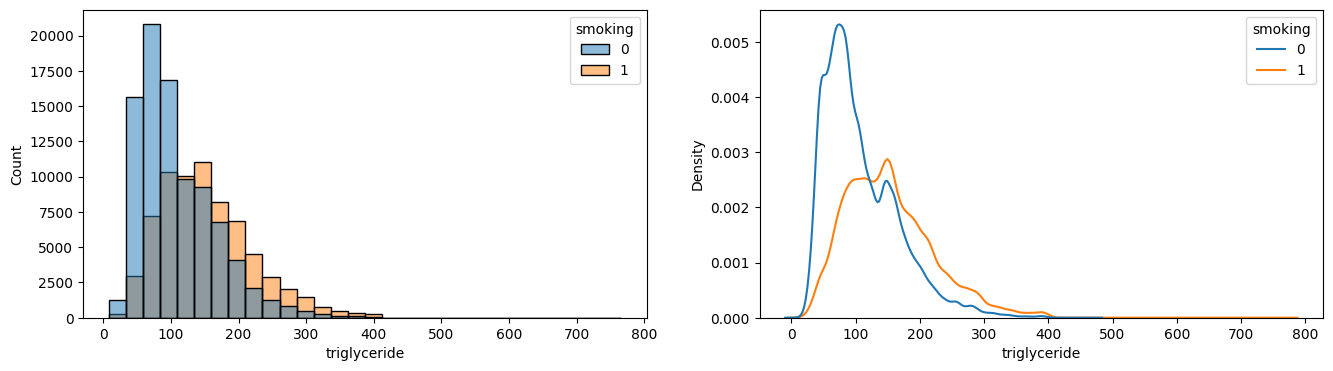

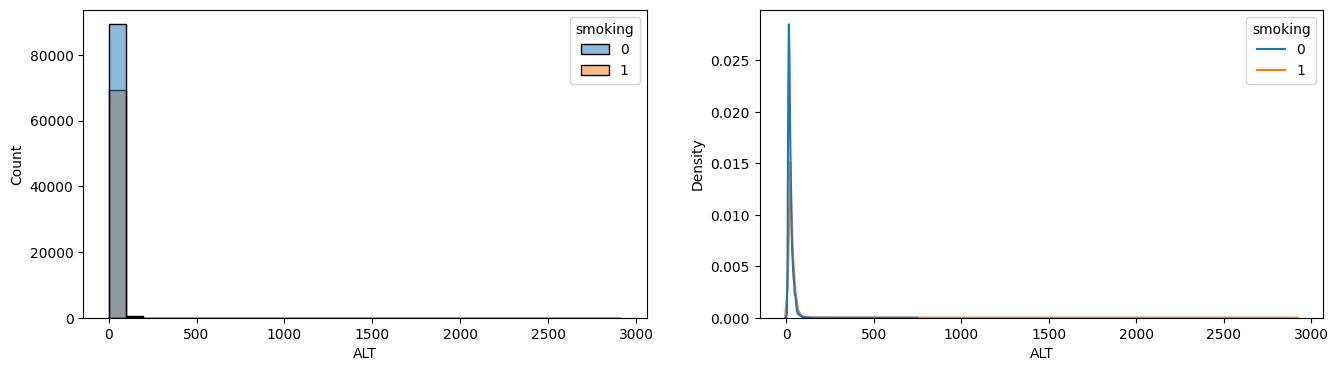

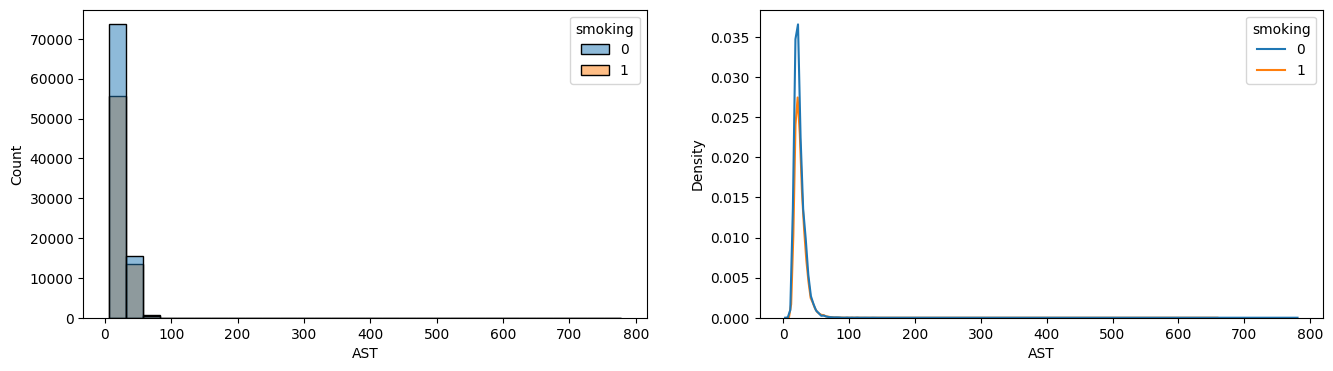

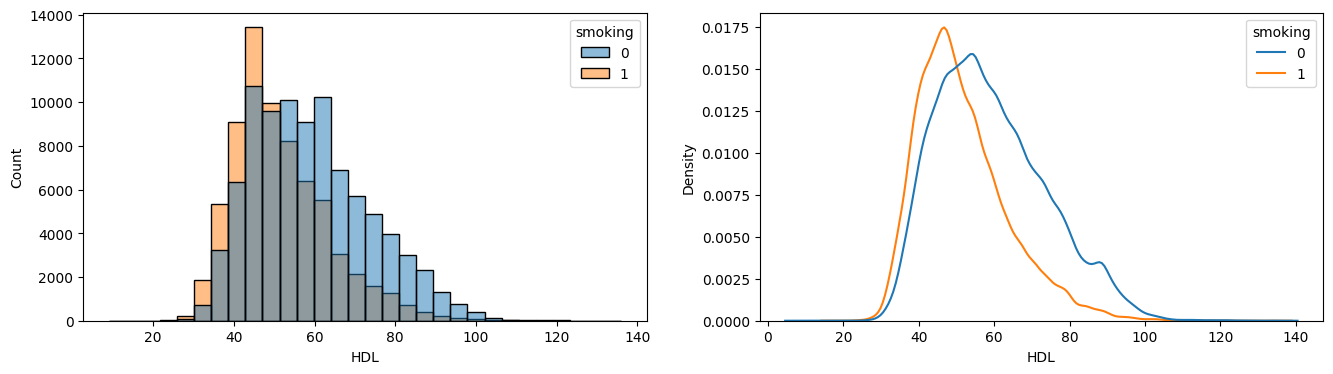

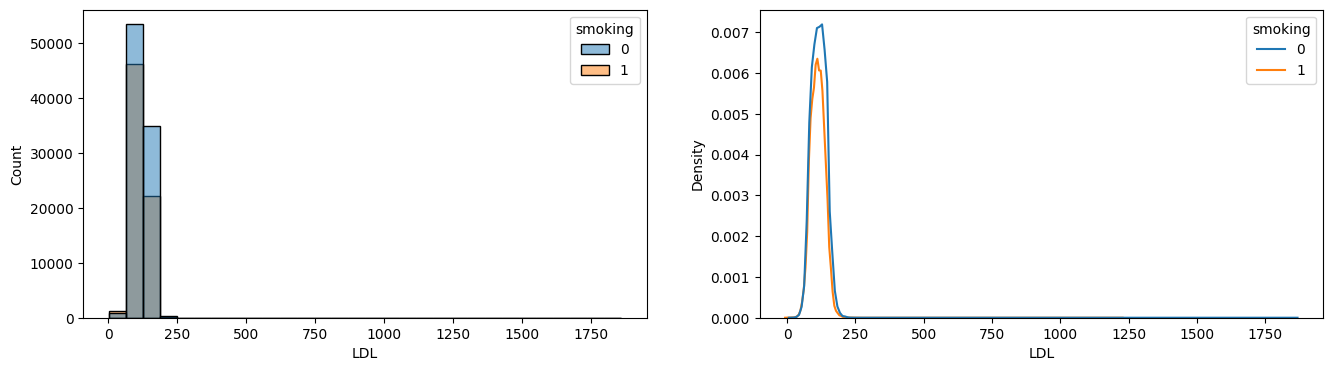

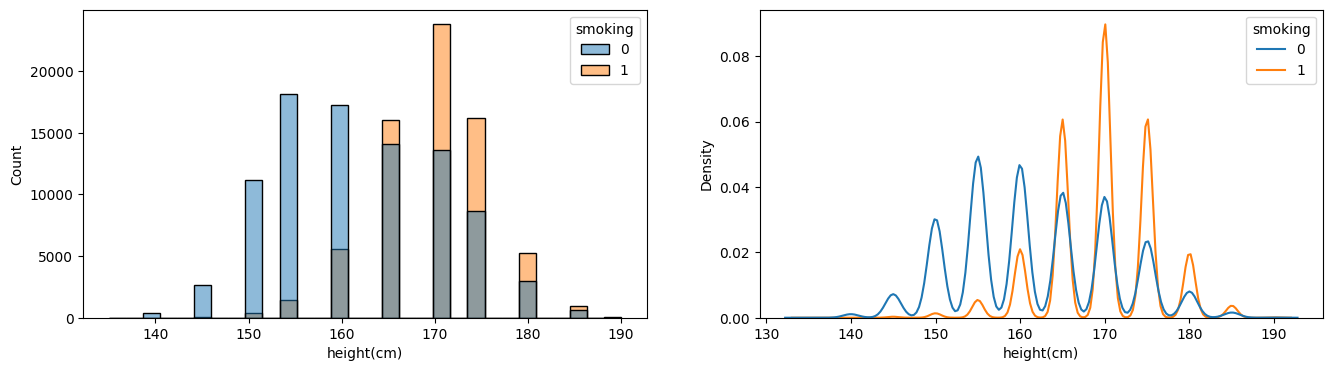

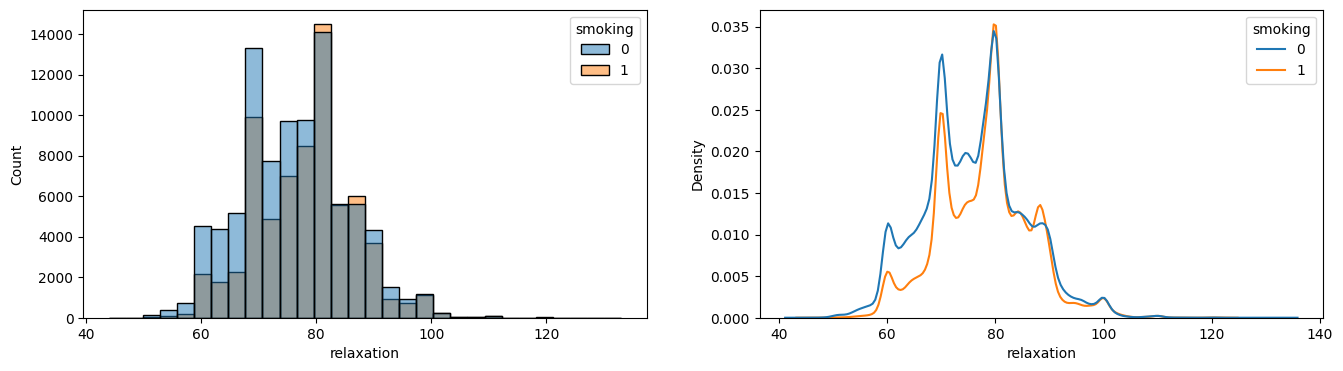

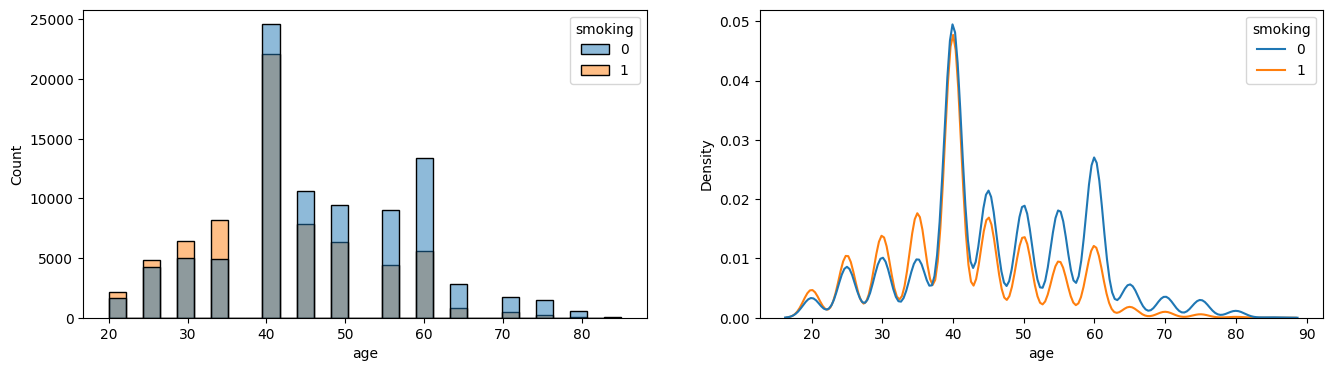

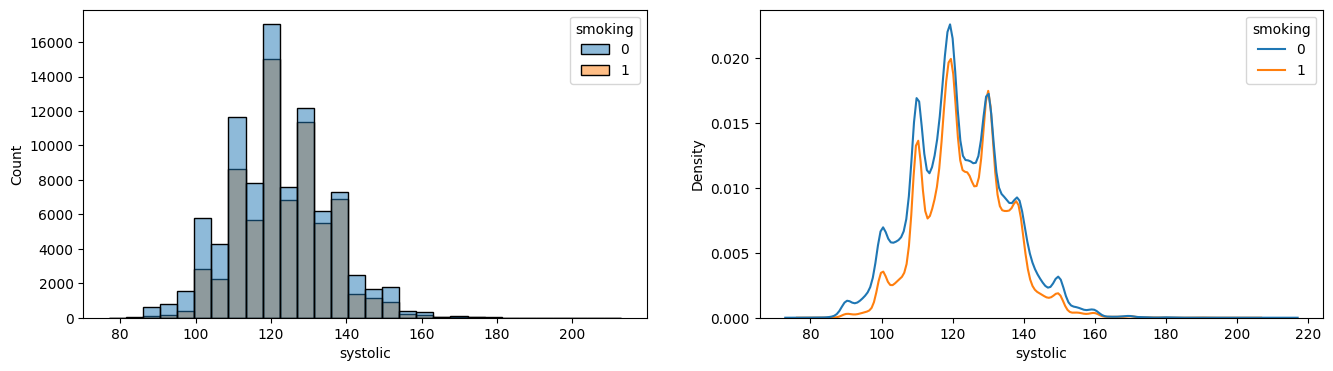

In [9]:
# Look at the ditribution of numerical features with respect to the Target

for var in numerical:
  # Create a figure with two subplots
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4))

  # Create a histogram on the first subplot
  sns.histplot(data=df, x=var, kde=False, hue='smoking', bins=30, ax=ax1)
  ax1.set_xlabel(var)
  ax1.set_ylabel('Count')

  # Create a density plot on the second subplot
  sns.kdeplot(data=df, x=var, hue='smoking', ax=ax2)
  ax2.set_xlabel(var)
  ax2.set_ylabel('Density')

  # Display the figure
  plt.show()

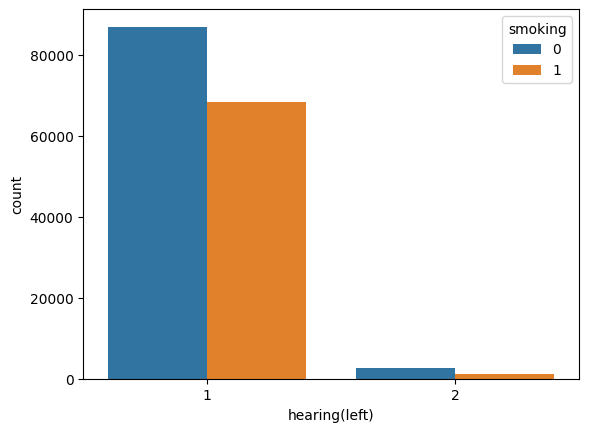

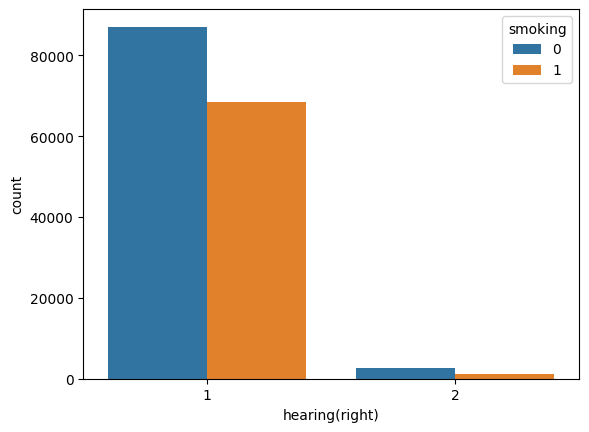

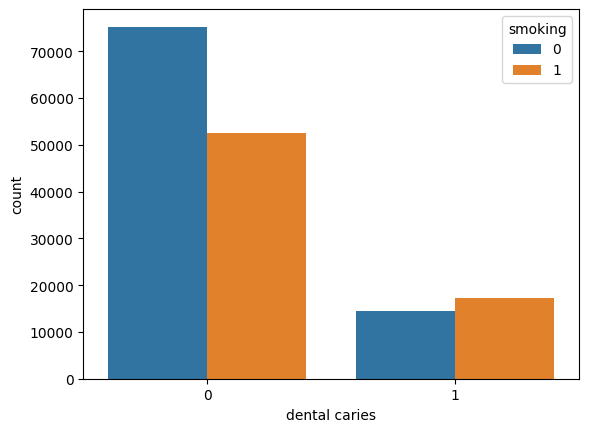

In [10]:
# Create a bar plot for each categorical features
for var in categorical:
    sns.countplot(x=var, hue="smoking", data=df)
    plt.show()

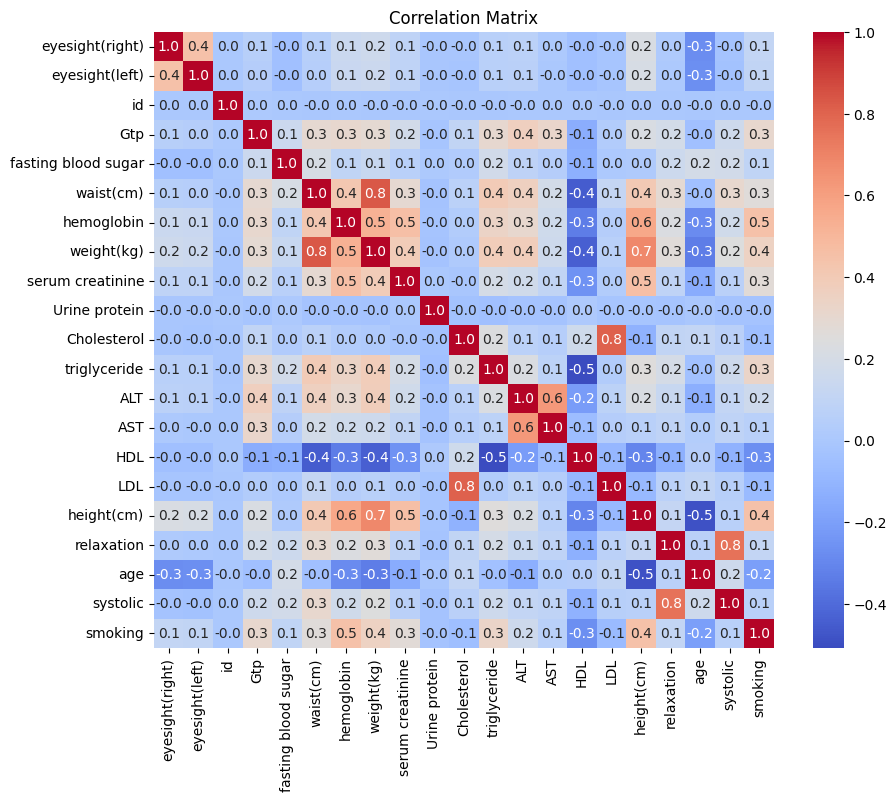

In [11]:
# Select the columns of interest

data = df[numerical + ['smoking']]

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a larger figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn library
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')

# Add a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [31]:
df['smoking'].value_counts()

0    89603
1    69653
Name: smoking, dtype: int64

In [12]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.smoking.values
y_val = df_val.smoking.values
y_test = df_test.smoking.values

del df_train['smoking']
del df_val['smoking']
del df_test['smoking']

In [13]:
df.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [2]:
### Feature Selection

In [14]:
# Assign the 'smoking' column as the target variable
y = df['smoking']

# Remove the 'smoking' column from the DataFrame and assign the remaining columns to X
X = df.drop(['smoking'], axis=1)
## Finding Important Features then Removing from Dataframe
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

list_one =[]
feature_ranking = SelectKBest(mutual_info_classif, k=15)
fit = feature_ranking.fit(X, y)

for i, (score, feature) in enumerate(zip(feature_ranking.scores_, X.columns)):
    list_one.append((score, feature))

dfObj = pd.DataFrame(list_one)
dfObj.sort_values(by=[0], ascending = False).iloc[:16]

,0,1
2,0.139902,height(cm)
16,0.134465,hemoglobin
21,0.101058,Gtp
3,0.079933,weight(kg)
13,0.076186,triglyceride
18,0.063662,serum creatinine
4,0.043661,waist(cm)
14,0.040289,HDL
20,0.029883,ALT
1,0.024806,age


In [33]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(X)
print(pca.explained_variance_ratio_.sum())

0.9999999991470272


In [34]:
X

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,300,40,75,16.5,1,1.0,22,25,27,0
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,55,57,126,16.2,1,1.1,27,23,37,1
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,197,45,93,17.4,1,0.8,27,31,53,0
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,203,38,102,15.9,1,1.0,20,27,30,1
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,87,44,93,15.4,1,0.8,19,13,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,47,72,159,14.5,1,0.8,25,26,13,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,202,64,108,14.5,1,0.6,21,20,18,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,45,87,93,10.9,1,0.6,15,9,12,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,148,55,80,14.4,1,1.1,22,17,37,0


In [15]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/pranabsarma18/.local/share/virtualenvs/mlzoom_midterm--OJycAUj/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
dv.feature_names_

['ALT',
 'AST',
 'Cholesterol',
 'Gtp',
 'HDL',
 'LDL',
 'Urine protein',
 'age',
 'dental caries=0',
 'dental caries=1',
 'eyesight(left)',
 'eyesight(right)',
 'fasting blood sugar',
 'hearing(left)=1',
 'hearing(left)=2',
 'hearing(right)=1',
 'hearing(right)=2',
 'height(cm)',
 'hemoglobin',
 'id',
 'relaxation',
 'serum creatinine',
 'systolic',
 'triglyceride',
 'waist(cm)',
 'weight(kg)']

In [19]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
smoking_decision = (y_pred >= 0.5)
(y_val == smoking_decision).mean()

0.7215158079809111

### Logistic Regression with k-fold cross-validation

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [36]:
logistic_regression = LogisticRegression()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [39]:
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


In [40]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [41]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [43]:
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')


Accuracy on the test set: 0.75


In [44]:
best_params

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [45]:
from sklearn.metrics import roc_auc_score

# Assuming you have predictions in the form of probabilities for class 1
# If your model gives class labels (0 or 1), you can use those directly
y_pred_prob = best_model.predict_proba(X_val)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_val, y_pred_prob)

print(f'AUC Score: {auc_score:.2f}')


AUC Score: 0.84


### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define your Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the scoring metric for grid search as roc_auc
scorer = make_scorer(roc_auc_score)

# Create a GridSearchCV object
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring=scorer, verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Calculate AUC score using the best model
y_pred_prob = best_model.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_pred_prob)
print("AUC Score with Best Model:", auc_score)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
AUC Score with Best Model: 0.8277858538214133


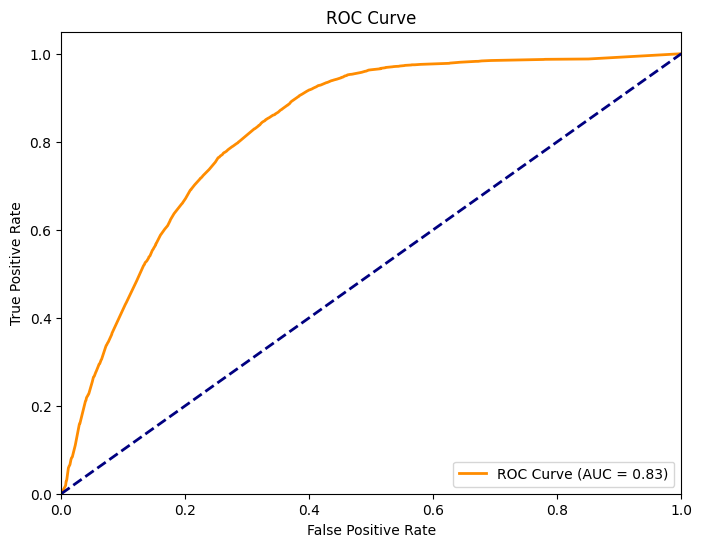

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_pred_prob = best_model.predict_proba(X_val)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# Calculate the AUC score
auc = roc_auc_score(y_val, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits


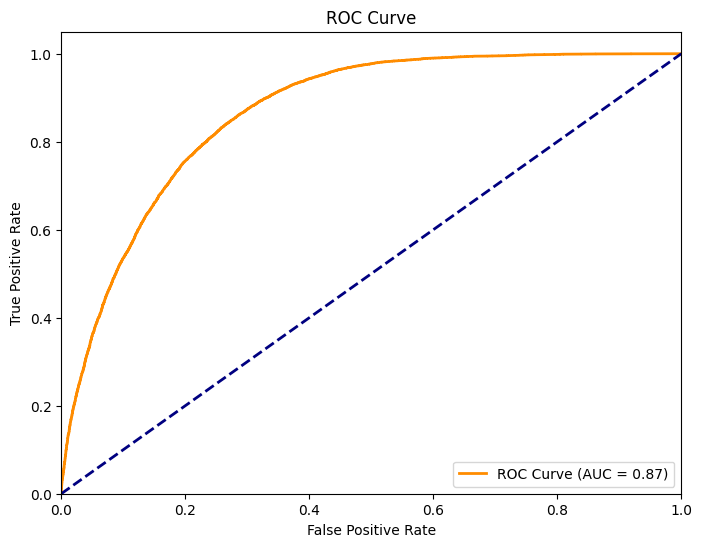

In [50]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define your XGBoost classifier
xgb_model = XGBClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Plot the ROC curve using the best model
# Get predicted probabilities for the positive class
y_pred_prob = best_model.predict_proba(X_val)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# Calculate the AUC score
auc = roc_auc_score(y_val, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [51]:
best_params

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

## Final Model

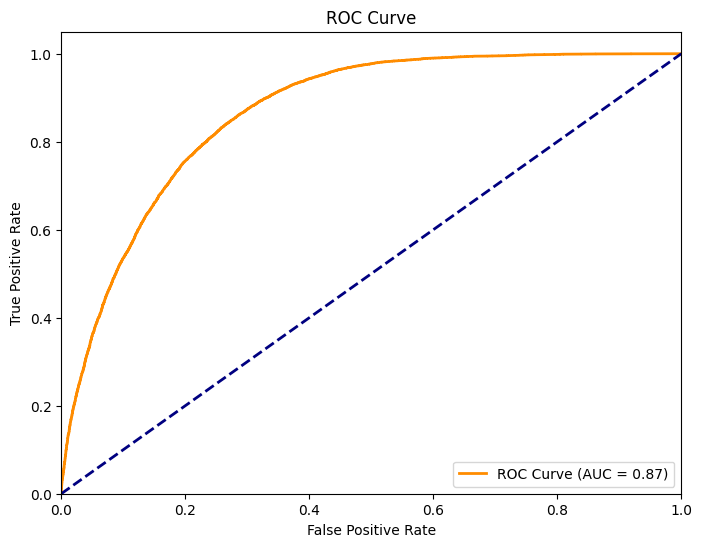

In [22]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a pipeline with MinMaxScaler, DictVectorizer, and XGBoost
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('xgb', XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=300))
])

# Fit the pipeline to your training data
pipeline.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob = pipeline.predict_proba(X_val)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# Calculate the AUC score
auc = roc_auc_score(y_val, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [23]:
pipeline

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

### Save the Final Model

In [24]:
import pickle

In [25]:
output_file = 'model.bin'

In [26]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)